<a href="https://colab.research.google.com/github/HHun1/big/blob/main_6/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_compact = pd.read_csv("rpi_data_compact.csv")
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df_compact.drop(['Unnamed: 0'], axis=1, inplace=True)
df_compact.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25


In [4]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [6]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [7]:
df_compact.isnull().sum().sum()

23

In [8]:
NaNs_pct = np.round(
    df_compact.isnull().sum().sum()/
    float(len(df_compact)*len(df_compact.columns))*100,
    decimals=4
)
print(
    f'The DataFrame contains : {NaNs_total} NaNs, ' +
    f'equal to {NaNs_pct} of the measurements'
)

The DataFrame contains : 23 NaNs, equal to 0.6765 of the measurements


In [9]:
df_compact_clean = df_compact.dropna()

In [10]:
print(f'DF length: before={len(df_compact)} ' +
      f'after={len(df_compact_clean)}'
)
# размер очищенного датасета меньше,
# т.к. удалились строки с хотя бы одним значение NaN
# при этом было насчитано 23 NaN значений,
# а удалилось меньше, следовательно, какие то 
# строки содержали больше одного NaN

DF length: before=680 after=673


In [11]:
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [12]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [13]:
pd.options.mode.chained_assignment = None

df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(float)
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(float)

df_compact_clean.dtypes

Ping (ms)                   object
Download (Mbit/s)           object
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [14]:
df_compact_clean.drop(
    columns=['Ping (ms)', 'Download (Mbit/s)'],
    inplace=True,
)

df_compact_clean.rename(
    columns={
        'Ping (ms)_float': 'Ping (ms)',
        'Download (Mbit/s)_float': 'Download (Mbit/s)',
    },
    inplace=True,
)

In [15]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [16]:
df_compact_clean = df_compact_clean.reindex(
    columns=[
        'Date',
        'Time',
        'Ping (ms)',
        'Download (Mbit/s)',
        'Upload (Mbit/s)',
    ]
)
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [17]:
df_compact_clean.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact_clean

In [18]:
means = df_clean.mean()
stands = df_clean.std()

stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

print(f'Average ping time: {stats_ping[0]} ± {stats_ping[1]} ms')
print(f'Average download speed: {stats_download[0]} ± {stats_download[1]} Mbit/s')
print(f'Average upload speed: {stats_upload[0]} ± {stats_upload[1]} Mbit/s')

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


In [19]:
mins = df_clean.min()
maxs = df_clean.max()

mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [20]:
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [21]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

In [22]:
df = pd.DataFrame({'field_1': [0, 1], 'field_2': [0, 2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [23]:
df.iloc[1]['field_1']

1

In [24]:
print(
    f'Ping measure reached minimum on {df_clean.iloc[argmin_ping]["Date"]}',
    f'at {df_clean.iloc[argmin_ping]["Time"]}'
)
print(
    f'Download measure reached minimum on {df_clean.iloc[argmin_download]["Date"]}',
    f'at {df_clean.iloc[argmin_download]["Time"]}'
)
print(
    f'Upload measure reached minimum on {df_clean.iloc[argmin_upload]["Date"]}',
    f'at {df_clean.iloc[argmin_upload]["Time"]}'
)

print(
    f'Ping measure reached maximum on {df_clean.iloc[argmax_ping]["Date"]}',
    f'at {df_clean.iloc[argmax_ping]["Time"]}'
)
print(
    f'Download measure reached maximum on {df_clean.iloc[argmax_download]["Date"]}',
    f'at {df_clean.iloc[argmax_download]["Time"]}'
)
print(
    f'Upload measure reached maximum on {df_clean.iloc[argmax_upload]["Date"]}',
    f'at {df_clean.iloc[argmax_upload]["Time"]}'
)

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [25]:
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [26]:
corr = df_corr.values
print(f'Correlation coefficient between ping and download: {corr[0, 1]}')
print(f'Correlation coefficient between ping and upload: {corr[0, 2]}')
print(f'Correlation coefficient between upload and download: {corr[2, 1]}')

Correlation coefficient between ping and download: -0.045626110258379995
Correlation coefficient between ping and upload: -0.4630987138300184
Correlation coefficient between upload and download: 0.08368996933725129


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

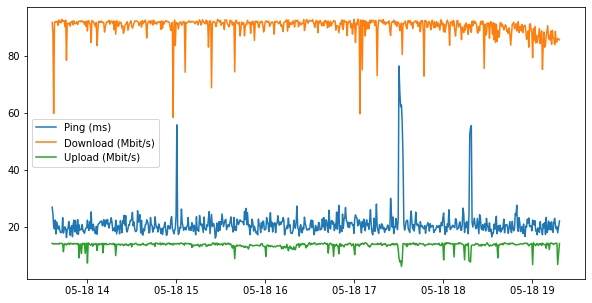

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.legend()
plt.show()

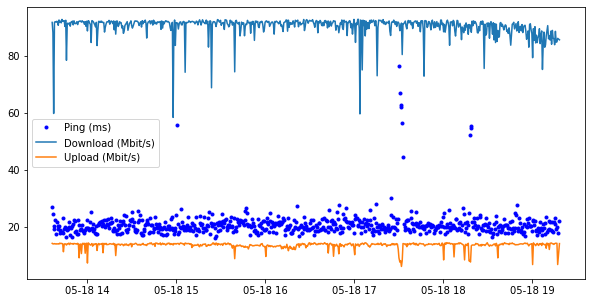

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], 'b.', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.legend()
plt.show()

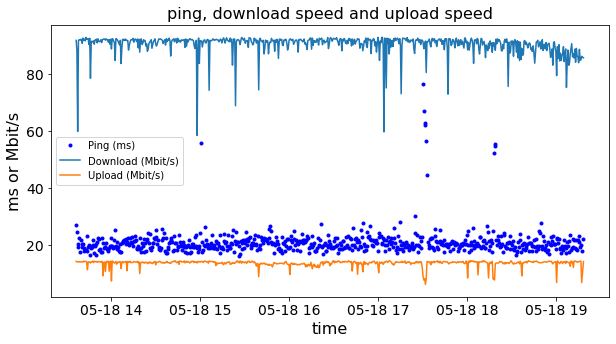

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_clean['Time'])

ax.plot(t, df_clean['Ping (ms)'], 'b.', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.legend()

ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('ms or Mbit/s', fontsize=16)
ax.set_title('ping, download speed and upload speed', fontsize=16)

ax.tick_params(labelsize=14)

plt.show()

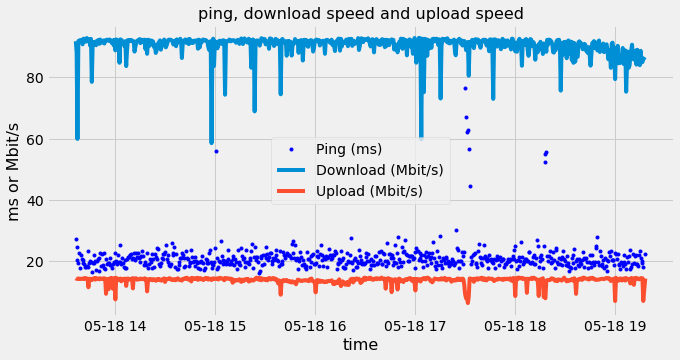

In [31]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    t = pd.to_datetime(df_clean['Time'])
    
    ax.plot(t, df_clean['Ping (ms)'], 'b.', label='Ping (ms)')
    ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
    ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
    
    ax.legend()
    
    ax.set_xlabel('time', fontsize=16)
    ax.set_ylabel('ms or Mbit/s', fontsize=16)
    ax.set_title('ping, download speed and upload speed', fontsize=16)
    
    ax.tick_params(labelsize=14)

plt.show()

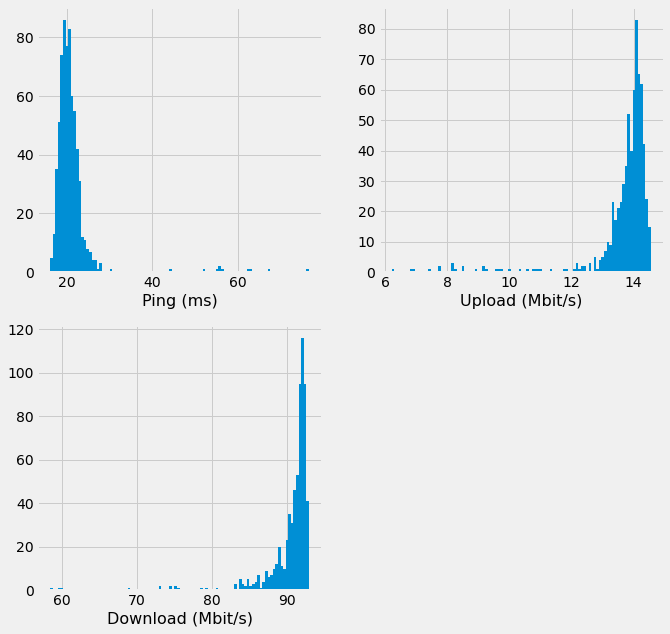

In [32]:
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    
    ax[1][1].set_visible(False)